# TP n°5 & 6 : Initiation au calcul Monte Carlo

Importe toutes les bibliothèques souhaitées 

In [2]:
import random
import matplotlib.pyplot as plt 
import math
import time
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.optimize import curve_fit

## Question 1 : Calcul de $\pi$ par Monte Carlo 

### Approxime pi en utilisant Monte-Carlo

In [3]:
def calcule_pi(n) :
    p = 0
    for i in  range (0,n) :
        x = random.random()
        y = random.random()
        if x**2 + y**2 < 1 :
            p += 1
    return 4*p/n

In [4]:
# Use the previous function
calcule_pi(452)

3.247787610619469

### Plot du modèle Monte-Carlo

Modification de calculate_pi

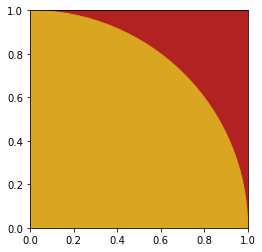

In [22]:
figure, axes = plt.subplots() 
plt.axis([0,1,0,1])
cc = plt.Circle((0,0),1, fill = True, color = 'goldenrod')
axes.set_aspect(1) 
axes.add_artist(cc) 
axes.set_facecolor('firebrick')

plt.savefig('circle.png')

In [11]:
def calcule_plot_pi(n) :
    
    figure, axes = plt.subplots() 
    plt.axis([0,1,0,1])
    cc = plt.Circle((0,0),1, fill = False)
    axes.set_aspect(1) 
    axes.add_artist(cc) 

    p = 0
    for i in  range (0,n) :
        x = random.random()
        y = random.random()
        if x**2 + y**2 < 1 :
            p += 1
        plt.scatter(x,y,marker = '+',c='r')
    return 4*p/n

3.08

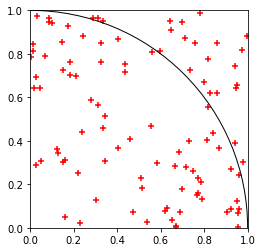

In [13]:
calcule_plot_pi(100)

### Calcul de l'écart relatif

Nombre de tirages pour avoir un écart relatif inférieur à 1/1000 puis à 1/100000 et temps d'éxécution 

In [101]:
def nb_iteration_pi_ecart_relatif (r) :
    start_time = time.time()
    p = 0
    n = 0
    pi = 0
    while abs(pi - math.pi)/math.pi > r :
        x = random.random()
        y = random.random()
        if x**2 + y**2 < 1 :
            p += 1
        n += 1
        pi = 4*p/n
        
    print("--- %s seconds ---" % (time.time() - start_time))
    print("Pi = ", pi)
    print("iterations =", n)

In [102]:
nb_iteration_pi_ecart_relatif(1e-3)

--- 5.1021575927734375e-05 seconds ---
Pi =  3.142857142857143
iterations = 42


In [185]:
nb_iteration_pi_ecart_relatif(1e-5)

--- 0.00038123130798339844 seconds ---
Pi =  3.1415797317436662
iterations = 671


Plot les graphes voulus 

In [229]:
def plot_pi_moyenne (N, moy) :
    
    p = [0 for i in range (0,moy)]
    
    pi_n = []
    disp_n = []
    
    for i in range(1, N+1) : 
        pi_moy = []
        for j in range(0, moy) :
            x = random.random()
            y = random.random()
            if x**2 + y**2 < 1 :
                p[j] += 1
            pi_moy.append(4*p[j]/i)
            
        pi_n.append(np.array(pi_moy).mean())
        disp_n.append(np.array(pi_moy).std())
        
    n = np.linspace(1, N, N)

        
    plt.plot(n, pi_n)
    plt.xlabel('Nombre itérations')
    plt.ylabel(r'Valeur moyenne de Pi')
    plt.show()
    
    plt.plot(n, disp_n)
    plt.xlabel('Nombre itérations')
    plt.ylabel(r'Dispersion')
    plt.show()

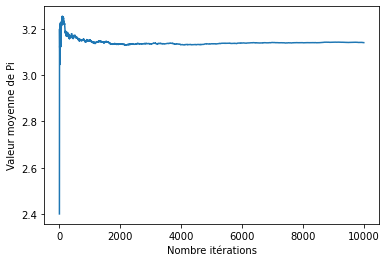

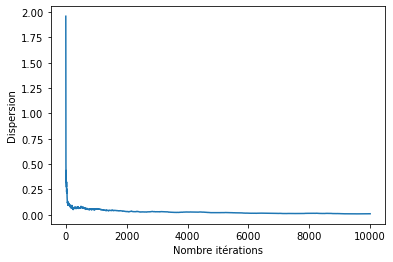

In [231]:
plot_pi_moyenne(10000,10)

In [232]:
def plot_temps_ecart (N) :
    
    start_time = time.time()
    p = 0
    pi = 0
    
    timer = []
    ecart = []
    
    for i in range(1, N+1) : 
        x = random.random()
        y = random.random()
        if x**2 + y**2 < 1 :
            p += 1
        pi = 4*p/i
        
        timer.append(time.time() - start_time)
        ecart.append((abs(pi - math.pi)/math.pi)*100)
        
    n = np.linspace(1, N, N)

        
    plt.plot(n, ecart)
    plt.xlabel('Nombre itérations')
    plt.ylabel('Erreur relative (%)')
    plt.show()
    
    plt.plot(n, timer)
    plt.xlabel('Nombre itérations')
    plt.ylabel('Temps de calcul (s)')
    plt.show()

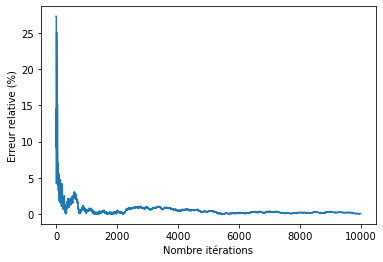

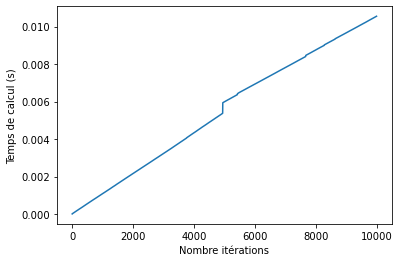

In [233]:
plot_temps_ecart(10000)

## Question 2 : Emission isotrope d'une source 

Pour les graphes dynamiques on installe plotly avec (dans le terminal) :
    
pip install plotly==5.3.1 ou conda install -c plotly plotly=5.3.1

puis

pip install dash

Creation d'une fonction pour les questions 2 et 3. Arguments :

n -> Nb de points à placer 

colmate -> La source est-elle colmatée ?

degre_colmate -> A combien de degré autour de l'axe z la source est-elle colmatée ?

plot -> Est ce qu'on plot les résultats ?

type_plot -> De quelle manière on plot les résulats (dynamique : graphe dynamique utilisant plotly, statique : graphe statique utilisant matplotlib)

retrieve_df -> est ce qu'on récupère les coordonneés de chaque point à la fin ?

In [12]:
def faisceau(n, colmate = True, degre_colmate = 10, plot = True, type_plot = 'dynamique', retrieve_df = True) : 
    
    x, y, z = [],[],[]
    for i in range(n):
        R1,R2 = random.random(), random.random()
        theta = math.acos(1-2*R1)
        phi = 2*math.pi*R2
        
        xi = math.sin(theta)*math.cos(phi)
        yi = math.sin(theta)*math.sin(phi)
        zi = math.cos(theta)
        
        if colmate == True :
        
            if theta < degre_colmate*math.pi/180 :
                x.append(xi)
                y.append(yi)
                z.append(zi)
                
        else : 
            x.append(xi)
            y.append(yi)
            z.append(zi)
    
    df = pd.DataFrame(np.array([x,y,z]).transpose(), columns=list('xyz'))
    
    if plot == True :
        if type_plot == 'dynamique' :
            
            title = "Emission isotrope à 1m"
            if colmate == True : 
                title += ", colmatée à " + str(degre_colmate) + "° autour de z"
            
            fig = px.scatter_3d(df, x='x', y='y', z='z', title = title)
 
            fig.update_layout(autosize= False,
                  width = 500,
                  height = 500,
                  scene = dict(xaxis = dict(range=[-1,1],), 
                               yaxis = dict(range=[-1,1],),
                               zaxis = dict(range=[-1,1],)))
            
            fig.update_traces(marker=dict(size=1))
            fig.show()
            
        elif type_plot == 'statique' :
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(projection='3d')
            ax.set_aspect("auto")
            
            plt.plot(df.iloc[:,0].values, df.iloc[:,1].values, df.iloc[:,2].values, '.')
            
            title = "Emission isotrope à 1m"
            
            if colmate == True : 
                title += ", colmatée à " + str(degre_colmate) + "° autour de z"
            
            plt.title(title)
            ax.set_xlim(-1,1)
            ax.set_ylim(-1,1)
            ax.set_zlim(-1,1)

            plt.show()
        else : 
            print(r"Le type_plot fourni n'est pas pris en charge par la fonction, essayez avec dynamique ou statique")
            
    if retrieve_df == True :
        return df

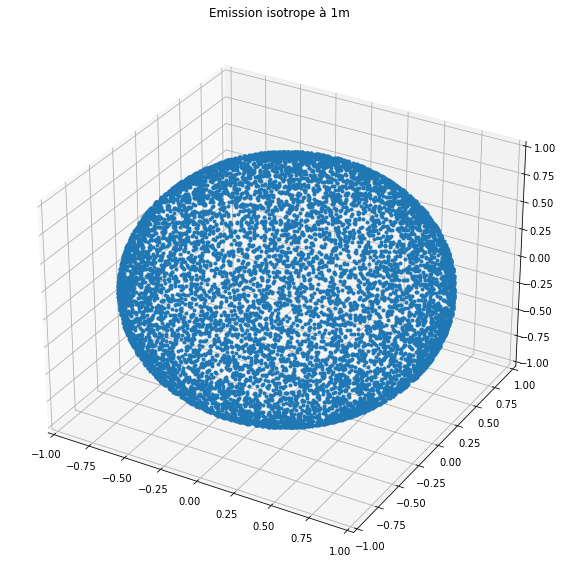

In [13]:
faisceau(10000, colmate = False, type_plot = 'statique', retrieve_df = False)

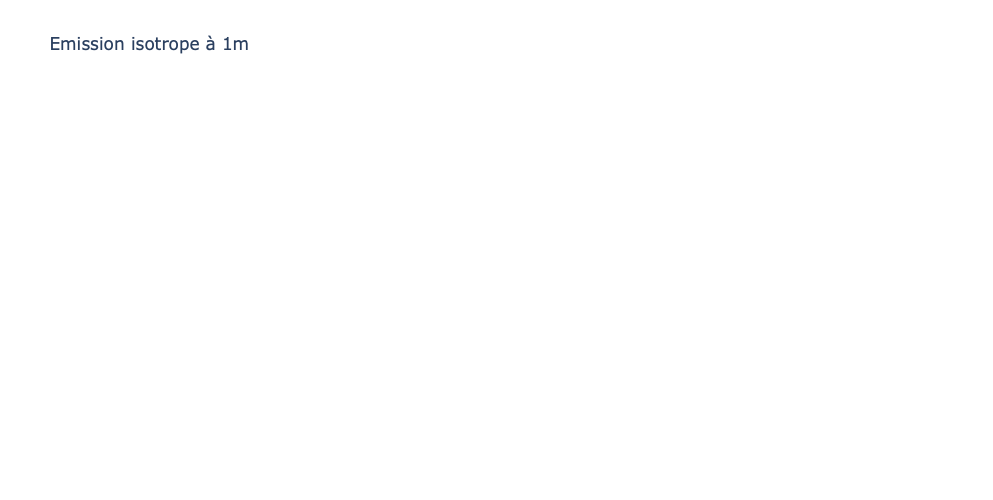

In [14]:
faisceau(10000, colmate = False, retrieve_df = False)

## Question 3 : Emission colmatée à 20°

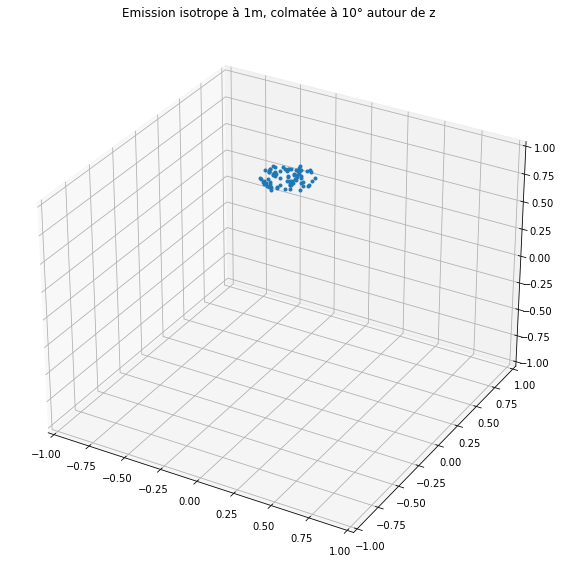

In [17]:
faisceau(10000, type_plot = 'statique', retrieve_df = False)

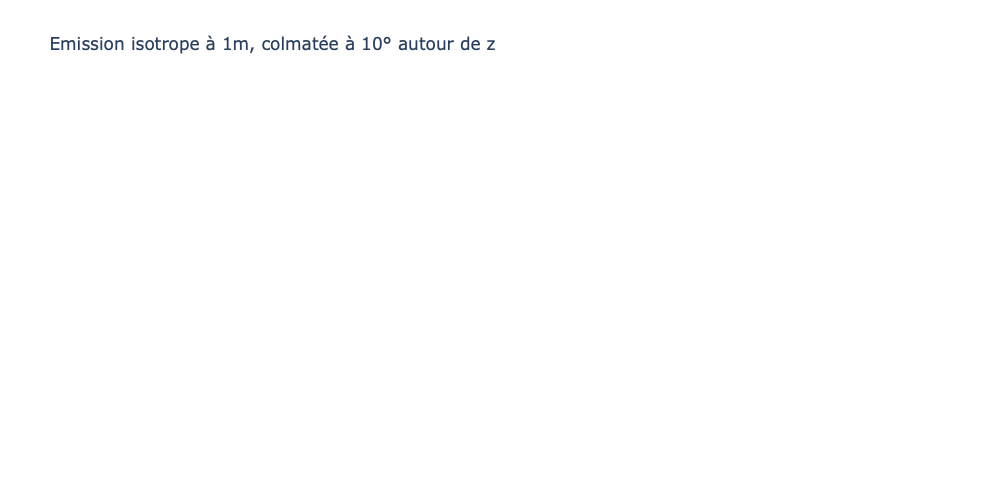

In [16]:
faisceau(10000, retrieve_df = False)

## Question 4 : Distance d'interaction

$\color{red}{\textbf{LA SUITE C'EST DE LA MERDE UTILE}}$

$N(x) = N_0 * e^{-\mu x}$

Donc proba p(x) d'interaction sur un parcours x est :

$p(x) = e^{-\mu x}$ -> avec x = l : $l = -\frac{ln(p(x))}{\mu}$

Donc sur une distance dx :

$\frac{dp}{dx}(x) = - \mu e^{-\mu x}$ (OK)

Or la p(x) -> 0 donc $l$ -> $\frac{1}{\mu}$

Donc $\frac{dp}{dx}(x) = - \frac{1}{l} e^{-\frac{1}{l} x}$ et $p(x) = e^{-\frac{1}{l} x}$

Donc la fonction de répartition est donnée par :

$F(x) = \int_{0}^{x} p(x') \, \mathrm{d}x' = \int_{0}^{x} e^{-\frac{1}{l}x'} \, \mathrm{d}x'$

Alors :
    
$F(x) = [-l \, e^{-\frac{1}{l}x'}]_{0}^{x} = l \, (1 - e^{-\frac{1}{l}x}) $

$x = - l \, ln(1 - \frac{u}{l}) = F^{-1}(u)$

$\color{red}{\textbf{FIN DE LA MERDE UTILE}}$, mettre fonction Monte Carlo à la place

In [4]:
E = [17e-3, 64e-3, 100e-3, 10]

mu_eau_theo = pd.read_excel('waterNIST.xlsx')
mu_eau_theo_E = np.interp(E, np.array(mu_eau_theo.iloc[:,0].values), np.array(mu_eau_theo.iloc[:,1].values))

In [27]:
# Distribution des distances d'interaction 

def dist_inv (n, mu, plotting = True) :
    
    d = - (1/mu) * np.log(1 - np.random.rand(n))
        
    N, x_ = np.histogram(d, 1000)
    N_cumulative = np.cumsum(N)
    xdata = np.delete(x_,-1)
    ydata = 1 - N_cumulative/n
    
    def func(x, mu):
        return np.exp(-mu*x)
    
    masque = [xdata[i] <= 100 for i in range (0,len(xdata))]
    
    xdata_cuve = xdata[masque]
    ydata_cuve = ydata[masque]

    mu_exp, cov = curve_fit(func, xdata_cuve, ydata_cuve)
    
    ytheo = func(xdata_cuve, mu)
    yfit = func(xdata_cuve, mu_exp)
    
    if plotting :
        plt.plot(xdata_cuve, ydata_cuve)
        plt.plot(xdata_cuve, ytheo)
        plt.plot(xdata_cuve, yfit)
        plt.xlabel("Distance d'interaction (cm)")
        plt.ylabel(r'$\frac{N}{N_0}$')
        plt.legend(('Données simulées','Données théoriques','Données fit'))
        plt.show()
    
    return mu_exp

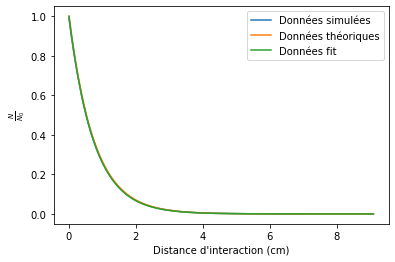

In [28]:
mu_exp = dist_inv (100000, mu_eau_theo_E[0])

In [26]:
mu_exp

array([1.34675357])

In [39]:
np.random.seed()
print(np.random.rand(10))
np.random.seed()
print(np.random.rand(10))

[0.65627256 0.9121168  0.01851989 0.34231054 0.71202532 0.54950392
 0.2780799  0.18486477 0.28025207 0.4080515 ]
[0.64216075 0.14402766 0.87349898 0.6842163  0.7376762  0.22237199
 0.21061551 0.80720411 0.63085225 0.25267278]


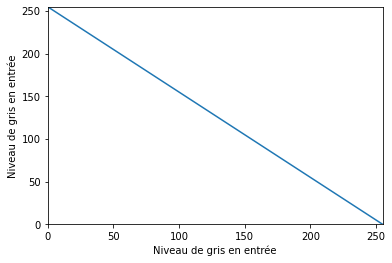

In [3]:
import matplotlib.pyplot as plt 

x = [0,255]
y = [255, 0]

plt.plot(x,y)
plt.xlabel('Niveau de gris en entrée')
plt.ylabel('Niveau de gris en entrée')
ax = plt.gca()
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
plt.savefig('negatif.png')